In [20]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [22]:
data = pd.read_csv("C:/Users/LIM/OneDrive - gachon.ac.kr/바탕 화면/study/인공지능개론/boston.csv")  #파일 경로 입력
data  #데이터 출력

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [24]:
# 데이터 전처리
data = data.drop(columns=["Unnamed: 0"])  #Unnamed: 0 열 삭제
data.columns  #나머지 열 확인

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [26]:
data.isnull().sum()  #결측치 확인

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

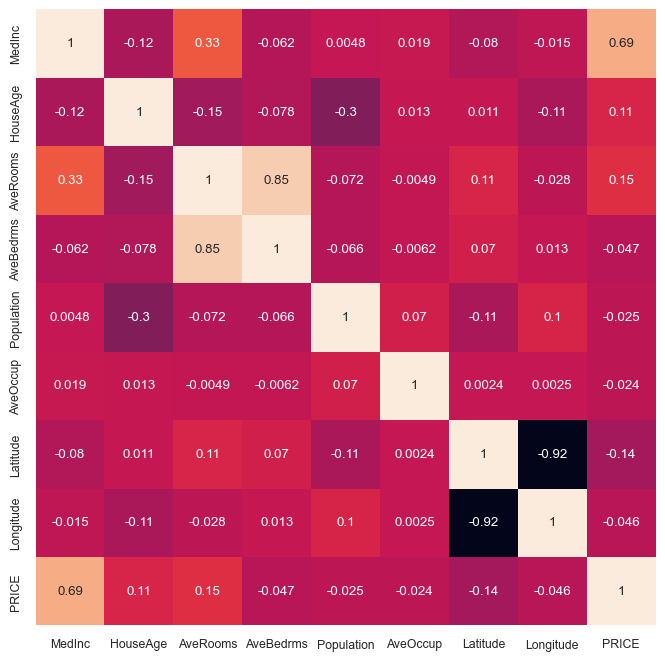

In [28]:
#상관관계 행렬
#0.3이상일 시 상관관계, 0.7이상일시 매우높음.
data_corr = data.corr()

# heatmap
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [30]:
#데이터 분리
X = data.drop(columns=['PRICE'])  #입력값 분리
X.head() #입력값 분리 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
y = data["PRICE"]  #출력값 분리
y.head()  #출력값 분리 확인

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)  #데이터 분할

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #데이터 분할 확인

((16512, 8), (4128, 8), (16512,), (4128,))

Linear Regression MSE: 0.5558915986952437


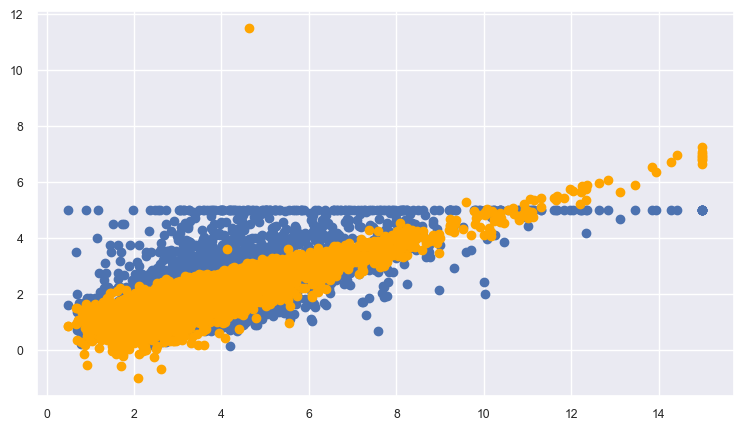

In [46]:
#LinearRegressor
model = LinearRegression()
model.fit(X_train, y_train)
lr_preds = model.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(lr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test['MedInc'], y_test, label="y_test")
plt.scatter(X_test['MedInc'], lr_preds, c="orange", label='lr_preds')
plt.show()

DecisionTreeRegressor MSE: 0.50257907070172


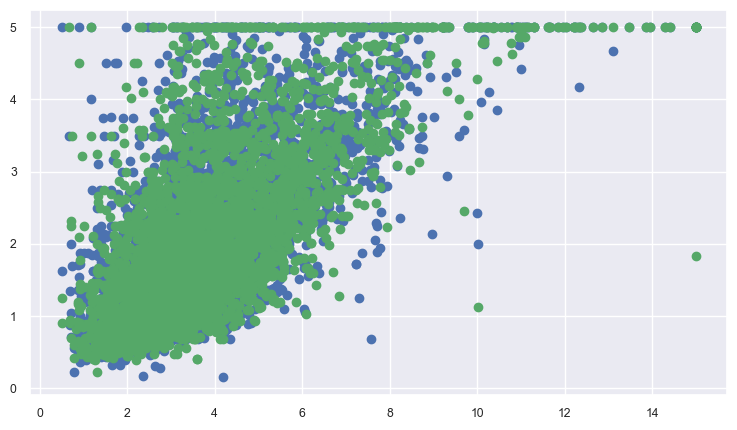

In [40]:
#DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dt_preds = model.predict(X_test)

print("DecisionTreeRegressor MSE:", mean_squared_error(dt_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test['MedInc'], y_test, label="y_test")
plt.scatter(X_test['MedInc'], dt_preds, c="g", label='dy_preds')
plt.show()

RandomForestRegressor MSE: 0.2539595203663885


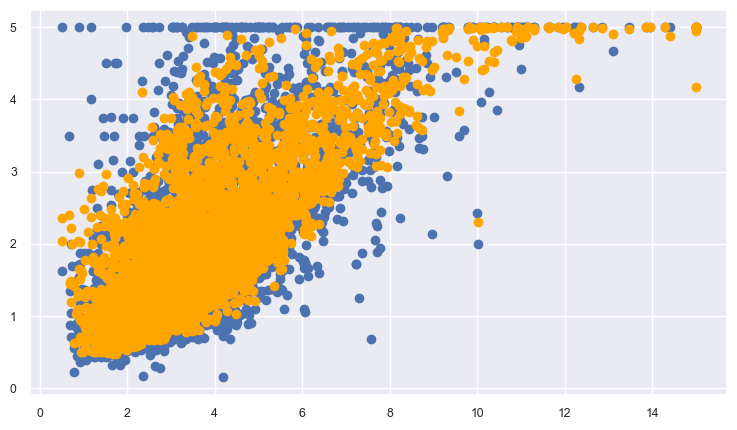

In [42]:
#RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
rf_preds = model.predict(X_test)

print("RandomForestRegressor MSE:", mean_squared_error(rf_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test['MedInc'], y_test, label="y_test")
plt.scatter(X_test['MedInc'], rf_preds, c="orange", label='rf_preds')
plt.show()

SVR MSE: 0.2557181286468539


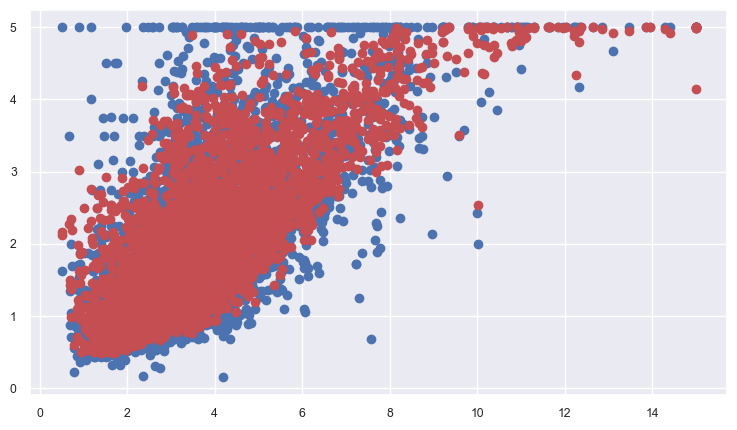

In [43]:
#SVR
model = RandomForestRegressor()
model.fit(X_train, y_train)
svr_preds = model.predict(X_test)

print("SVR MSE:", mean_squared_error(svr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test['MedInc'], y_test, label="y_test")
plt.scatter(X_test['MedInc'], svr_preds, c="r", label='svr_preds')
plt.show()